In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Agenda
  1. Data Cleaning
  2. Data Split By Time Frame
  3. Feature Selection
  4. Aggregate by CustomerID
  5. Choose Model

# Environment Setup

In [0]:
import os
os.chdir('/content/drive/Shared drives/#PA_Customer Revenue Prediction/')
os.getcwd()

'/content/drive/Shared drives/#PA_Customer Revenue Prediction'

### Import library

In [0]:
import pandas as pd
import numpy as np
import datetime
import sklearn
from sklearn import preprocessing

### Load expanded dataset

We expand all the complex json fields in the original Google Analytics Dataset using R and saved the expanded csv file as "cleaned_train_v2.csv", which serves as starting point for all further analysis.

In [0]:
raw_train_original = pd.read_csv('cleaned_train_v2.csv', sep = ',')
raw_test_original = pd.read_csv('cleaned_test_v2.csv', sep = ',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Structuring

### Rename columns

In [0]:
# Rename all the columns for clarity
raw_train = raw_train_original.copy()
raw_train.columns = ['Unnamed: 0', 'channelGrouping', 'date', 'fullVisitorId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser', 'device_browserVersion',
       'device_browserSize', 'device_operatingSystem', 'device_operatingSystemVersion', 'device_isMobile',
       'device_mobileDeviceBranding', 'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName', 'flashVersion',
       'language', 'device_screenColors', 'device_screenResolution', 'deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country', 'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude', 'geoNetwork_longitude', 'geoNetwork_networkLocation',
       'trafficSource_campaign', 'trafficSource_source',  'trafficSource_medium', 'trafficSource_keyword',          
       'trafficSource_referralPath',
       'trafficSource_isTrueDirect','trafficSource_adContent','campaignCode',
       'trafficSource_adwordsClickInfo.criteriaParameters', 'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.adNetworkType', 'trafficSource_adwordsClickInfo.isVideoAd',
       'totals_visits', 'totals_hits', 'totals_pageviews','totals_bounces','totals_newVisits','totals_sessionQualityDim',
       'totals_timeOnSite','totals_transactions', 'totals_transactionRevenue',
       'totals_totalTransactionRevenue']

In [0]:
raw_test = raw_train_original.copy()
raw_test.columns = ['Unnamed: 0', 'channelGrouping', 'date', 'fullVisitorId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser', 'device_browserVersion',
       'device_browserSize', 'device_operatingSystem', 'device_operatingSystemVersion', 'device_isMobile',
       'device_mobileDeviceBranding', 'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName', 'flashVersion',
       'language', 'device_screenColors', 'device_screenResolution', 'deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country', 'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude', 'geoNetwork_longitude', 'geoNetwork_networkLocation',
       'trafficSource_campaign', 'trafficSource_source',  'trafficSource_medium', 'trafficSource_keyword', 'trafficSource_referralPath', 
       'trafficSource_isTrueDirect', 'trafficSource_adContent',  'campaignCode',
       'trafficSource_adwordsClickInfo.criteriaParameters', 
       'trafficSource_adwordsClickInfo.page', 'trafficSource_adwordsClickInfo.slot',
       'trafficSource_adwordsClickInfo.gclId', 'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.isVideoAd', 'totals_visits', 'totals_hits', 'totals_pageviews', 
       'totals_timeOnSite', 'totals_sessionQualityDim', 'totals_newVisits', 'totals_transactions', 
       'totals_transactionRevenue', 'totals_totalTransactionRevenue', 'totals_bounces']

In [0]:
# view current data type
#raw_train.dtypes
#raw_test.dtypes

### Drop bad columns

In [0]:
# columns that we decide to eliminate
columns_delete = ['device_browserSize','device_browserVersion','flashVersion','language', \
                 'device_mobileDeviceBranding','device_mobileDeviceInfo','device_mobileDeviceMarketingName', \
                 'device_mobileDeviceModel','device_mobileInputSelector','device_operatingSystemVersion', \
                 'device_screenColors','device_screenResolution','geoNetwork_cityId','geoNetwork_latitude', \
                 'geoNetwork_longitude','geoNetwork_networkLocation','trafficSource_adwordsClickInfo.criteriaParameters']

In [0]:
# drop those columns
raw_train1 = raw_train.drop(columns_delete, axis =1)

In [0]:
raw_test1 = raw_test.drop(columns_delete, axis =1)

### Convert number characters to numerics

In [0]:
# columns that are composed of numbers but are misread as categorical data
columns_like_num_cate = ['totals_bounces','totals_hits','totals_newVisits','totals_pageviews', \
                        'totals_sessionQualityDim','totals_timeOnSite','totals_totalTransactionRevenue', \
                        'totals_transactionRevenue','totals_transactions','totals_visits','trafficSource_adwordsClickInfo.page']

In [0]:
# convert those columns into numerical data
raw_train2 = raw_train1.copy()
raw_train2[columns_like_num_cate] = raw_train2[columns_like_num_cate].applymap(lambda x: pd.to_numeric(x, errors='ignore'))

In [0]:
raw_test2 = raw_test1.copy()
raw_test2[columns_like_num_cate] = raw_test2[columns_like_num_cate].applymap(lambda x: pd.to_numeric(x, errors='ignore'))

### Convert categorical data using dummies

In [0]:
# categorical columns that needs dummies to be converted into numerics
columns_cate = ['channelGrouping','device_browser','deviceCategory', \
               'device_operatingSystem','device_isMobile','geoNetwork_city','geoNetwork_continent','geoNetwork_country', \
               'geoNetwork_metro','geoNetwork_networkDomain','geoNetwork_region','geoNetwork_subContinent', \
               'trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType','trafficSource_adwordsClickInfo.gclId', \
               'trafficSource_adwordsClickInfo.isVideoAd','trafficSource_adwordsClickInfo.slot', \
               'trafficSource_campaign','trafficSource_isTrueDirect','trafficSource_keyword', \
               'trafficSource_medium','trafficSource_referralPath','trafficSource_source']

In [0]:
# convert those columns into dummies with label encoder
raw_train3 = raw_train2.copy()
for col in columns_cate:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(raw_train3[col].values.astype('str')))
    raw_train3[col] = lbl.transform(list(raw_train3[col].values.astype('str')))

In [0]:
raw_test3 = raw_test2.copy()
for col in columns_cate:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(raw_test3[col].values.astype('str')))
    raw_test3[col] = lbl.transform(list(raw_test3[col].values.astype('str')))

channelGrouping
device_browser
deviceCategory
device_operatingSystem
device_isMobile
geoNetwork_city
geoNetwork_continent
geoNetwork_country
geoNetwork_metro
geoNetwork_networkDomain
geoNetwork_region
geoNetwork_subContinent
trafficSource_adContent
trafficSource_adwordsClickInfo.adNetworkType
trafficSource_adwordsClickInfo.gclId
trafficSource_adwordsClickInfo.isVideoAd
trafficSource_adwordsClickInfo.slot
trafficSource_campaign
trafficSource_isTrueDirect
trafficSource_keyword
trafficSource_medium
trafficSource_referralPath
trafficSource_source


### Impute null revenue

In [0]:
# since most transaction revenue is null, we decide to replace it to 0
raw_train4 = raw_train3.copy()
raw_train4['totals_transactionRevenue'] = raw_train4['totals_transactionRevenue'].fillna(0)
raw_train4['totals_transactionRevenue'].describe()

count    1.708337e+06
mean     1.355906e+06
std      4.522809e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: totals_transactionRevenue, dtype: float64

In [0]:
# for numerical data, change NA into 0
# for categorical data, change NA into -999
raw_train4[columns_like_num_cate] = raw_train4[columns_like_num_cate].fillna(0)
raw_train4[columns_cate] = raw_train4[columns_cate].fillna(-999)

In [0]:
raw_test4 = raw_test3.copy()
raw_test4['totals_transactionRevenue'] = raw_test4['totals_transactionRevenue'].fillna(0)
raw_test4['totals_transactionRevenue'].describe()

count    1.708337e+06
mean     1.131510e-02
std      1.154636e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.500000e+01
Name: totals_transactionRevenue, dtype: float64

In [0]:
raw_test4[columns_like_num_cate] = raw_test[columns_like_num_cate].fillna(0)
raw_test4[columns_cate] = raw_test[columns_cate].fillna(-999)

# 2. Feature Selection

### 1) LightBGM

In [0]:
pip install lightgbm

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
clean = train_df.copy()
test = test_df.copy()

In [0]:
from sklearn import ensemble
import pandas as pd
from sklearn.feature_selection import SelectFromModel

In [0]:
columns_cate = ['channelGrouping','device_browser','deviceCategory', \
               'device_operatingSystem','device_isMobile','geoNetwork_city','geoNetwork_continent','geoNetwork_country', \
               'geoNetwork_metro','geoNetwork_networkDomain','geoNetwork_region','geoNetwork_subContinent', \
               'trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType','trafficSource_adwordsClickInfo.gclId', \
               'trafficSource_adwordsClickInfo.isVideoAd','trafficSource_adwordsClickInfo.slot', \
               'trafficSource_campaign','trafficSource_isTrueDirect','trafficSource_keyword', \
                'trafficSource_medium','trafficSource_referralPath','trafficSource_source']
columns_num = ['visitNumber','totals_bounces','totals_hits','totals_newVisits','totals_pageviews', \
                        'totals_sessionQualityDim','totals_timeOnSite','totals_transactions','totals_visits','trafficSource_adwordsClickInfo.page']

In [0]:
import datetime
import numpy as np

In [0]:
# Split the train dataset into development and valid based on time 
dev_df = clean[clean['date']<= '2017-05-31']
val_df = clean[clean['date']> '2017-05-31']
dev_y = np.log1p(dev_df["totals_transactionRevenue"].values)
val_y = np.log1p(val_df["totals_transactionRevenue"].values)

dev_X = dev_df[columns_cate + columns_num] 
val_X = val_df[columns_cate + columns_num] 
test_X = test[columns_cate + columns_num]

In [0]:
import lightgbm as lgb

In [0]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.125044
[200]	valid_0's rmse: 0.122864
Early stopping, best iteration is:
[172]	valid_0's rmse: 0.122295


In [0]:
from sklearn import metrics
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId_str":val_df["fullVisitorId_str"].values})
val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId_str")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

0.1220432876391895


In [0]:
test_id = test['fullVisitorId_str'].values
sub_df = pd.DataFrame({"fullVisitorId_str":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId_str")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId_str", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("baseline_lgb.csv", index=False)

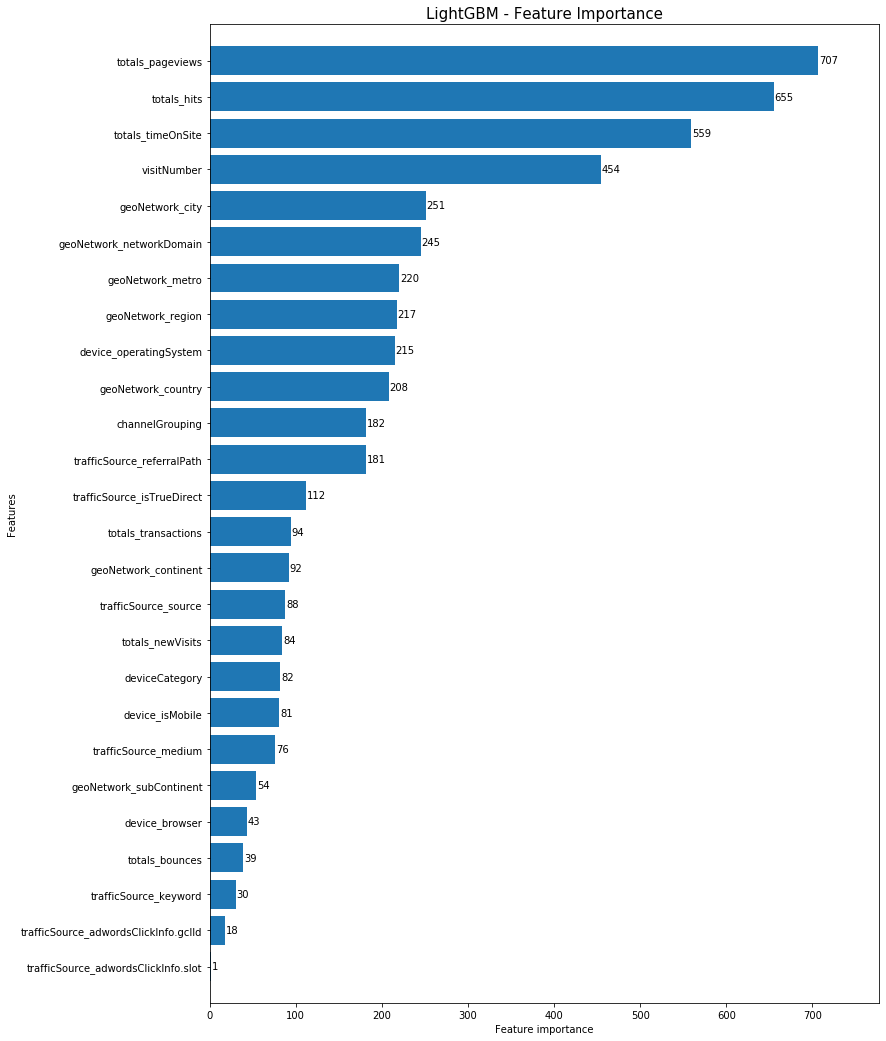

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

### 2) XGBoost

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 1.0, 'Xgboost - Feature Importance')

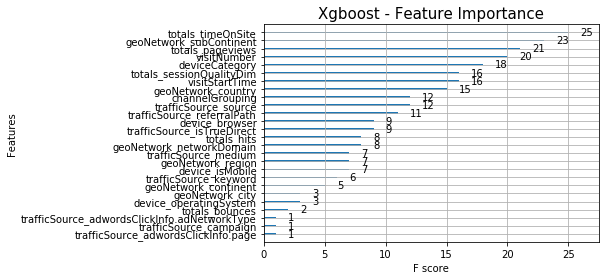

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd

data = train_df
x = data.iloc[:,0:56]
y = data['totals_transactionRevenue']
y[y.isnull()] = 0

x = x[['channelGrouping',
    	'visitNumber', 'visitStartTime',
   	'device_browser',
   	'device_operatingSystem',
   	'device_isMobile',  'deviceCategory',
   	'geoNetwork_continent', 'geoNetwork_subContinent',
   	'geoNetwork_country', 'geoNetwork_region', 'geoNetwork_metro',
   	'geoNetwork_city', 'geoNetwork_networkDomain',
   	'trafficSource_campaign',
   	'trafficSource_source', 'trafficSource_medium',
   	'trafficSource_keyword', 'trafficSource_referralPath',
   	'trafficSource_isTrueDirect', 'trafficSource_adContent',
   	'trafficSource_adwordsClickInfo.page',
   	'trafficSource_adwordsClickInfo.slot',
   	'trafficSource_adwordsClickInfo.gclId',
   	'trafficSource_adwordsClickInfo.adNetworkType',
   	'trafficSource_adwordsClickInfo.isVideoAd', 'totals_visits',
   	'totals_hits', 'totals_pageviews', 'totals_bounces',
   	'totals_newVisits', 'totals_sessionQualityDim',
   	'totals_timeOnSite' ]]
x[x.isnull()] = 0    
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5,
                     	alpha = 10, n_estimators = 10)
xg_reg.fit(x, y)
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.title('Xgboost - Feature Importance', fontsize = 15)

### 3) Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                      	n_jobs = -1,
                      	oob_score = True,
                      	bootstrap = True,
                      	random_state = 42)

rf.fit(x, y)

sort_zip = sorted(zip(x.columns, rf.feature_importances_),key= lambda t: t[1])
fig, ax = plt.subplots()
bar_plot = plt.barh([val[0] for val in sort_zip], [val[1] for val in sort_zip], align='center')
plt.title('Random Forest - Feature Importance', fontsize = 15)

# Data Split by Time Frame

In [0]:
# date_time_str = '2018-06-29 08:15:27.243860' (2016-08-01 to 2018-04-30)
def split_by_date(df, start_date_str):
    df['date'] = pd.to_datetime(df['date'])
    
    start_date_X = datetime.datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date_X = start_date_X + datetime.timedelta(days=168)
    
    start_date_y = end_date_X + datetime.timedelta(days=46)
    end_date_y = start_date_y + datetime.timedelta(days=62)
    
    mask_X = (df['date'] >= start_date_X) & (df['date'] < end_date_X)
    mask_y = (df['date'] >= start_date_y) & (df['date'] < end_date_y)
    
    X = df.loc[mask_X]
    y = df.loc[mask_y]
    
    return X, y

In [0]:
data = pd.read_csv('train.csv')
#data = raw_train4
data['tf_maxdate'] = data['date'].max()
data['tf_mindate'] = data['date'].min()

X1, y1 = split_by_date(data, '2016-08-01')
X2, y2 = split_by_date(data, '2017-01-16')
X3, y3 = split_by_date(data, '2017-07-03')
X4, y4 = split_by_date(data, '2017-12-18')

In [0]:
X1.head(2)

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,campaignCode,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,tf_maxdate,tf_mindate
2989,2990,4,2016-09-02,9499785259412240342,1472812272,1,1472812272,43,20,0,0,4,22,144,482,122,955,6636,4,99,5,7,3196,1,62,NaN,0.0,3,59008,3,1,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2018-04-30,2016-08-01
2990,2991,4,2016-09-02,3696906537737368442,1472856874,1,1472856874,35,20,0,0,2,15,9,67,0,134,28380,4,99,5,7,3196,1,62,NaN,0.0,3,59008,3,1,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2018-04-30,2016-08-01


# 4. Features/Columns Aggregation

### Train input

In [0]:
# add a column 'will_purchase' to indicate if the current unique visitor will make a purchase 2 month later
# 1 means will, 0 means no
def get_future_purchase(X, y):
    X_by_id = X.groupby('fullVisitorId_str').sum()[['device_browser','device_isMobile']]
    y_by_id = y.groupby('fullVisitorId_str').sum()[['visitNumber','totals_transactionRevenue']] # or 'totals_transactionRevenue'?
    
    # DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
    Xy_by_id = X_by_id.join(y_by_id, on='fullVisitorId_str', how='left')
    
    # df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
    Xy_by_id['will_return'] = np.where(np.isnan(Xy_by_id['totals_transactionRevenue']), 0, 1)
    Xy_by_id['how_much'] = Xy_by_id['totals_transactionRevenue'].apply(lambda x:np.log(x+1))
    Xy_by_id2 = Xy_by_id[['will_return', 'how_much']]
    
    return Xy_by_id2

In [0]:
#get_future_purchase(X1, y1)

In [0]:
def feature_engineer(df):
    
    date_format = '%Y-%m-%d'
    df['date'] = pd.to_datetime(df['date'], format=date_format)
    column_cate = ['fullVisitorId_str','channelGrouping','device_browser','device_operatingSystem','deviceCategory','geoNetwork_continent', \
                  'geoNetwork_subContinent','geoNetwork_country','geoNetwork_region','geoNetwork_metro','geoNetwork_city', \
                  'geoNetwork_networkDomain','trafficSource_source','trafficSource_medium']
    #for all the categorical data, select the most frequent one
    df2 = df[column_cate].groupby('fullVisitorId_str').agg(lambda x: x.value_counts().index[0])

    df1 = df.groupby('fullVisitorId_str').agg({'date':['min','max'],
                                           'tf_mindate': 'min',
                                           'tf_maxdate': 'max',                                      
                                           'trafficSource_adwordsClickInfo.isVideoAd': 'mean',
                                           'device_isMobile': 'mean',
                                           'trafficSource_isTrueDirect': 'mean',
                                           'totals_bounces':'sum',
                                           'totals_hits': ['sum', 'mean', 'min', 'max', 'median', 'std'],
                                           'totals_pageviews': ['sum', 'mean', 'min', 'max', 'median', 'std'], 
                                           'totals_transactionRevenue': 'sum',
                                           'totals_transactions': 'sum'})
    df3 = pd.merge(df2,df1,on='fullVisitorId_str')
    return df3

In [0]:
#a = feature_engineer(X1)

In [0]:
def feature_engineer2(df1, df):
    date_format = '%Y-%m-%d'
    df1['first_ses_from_the_period_start'] = df1['date']['min'] - pd.to_datetime(df1['tf_mindate']['min'], format=date_format)
    df1['first_ses_from_the_period_start'] = df1['first_ses_from_the_period_start'].astype('timedelta64[D]')
    df1['last_ses_from_the_period_end'] = pd.to_datetime(df1['tf_maxdate']['max'], format=date_format) - df1['date']['max']
    df1['last_ses_from_the_period_end'] = df1['last_ses_from_the_period_end'].astype('timedelta64[D]')
    df1['interval_dates'] = df1['date']['max'] - df1['date']['min']
    df1['interval_dates'] = df1['interval_dates'].astype('timedelta64[D]')
    df1 = df1.iloc[:,4:]
    df2 = df.groupby('fullVisitorId')['date'].nunique().rename('unique_date_num')
    df_return = pd.merge(df1, df2, on = 'fullVisitorId')
    return df_return

In [0]:
#feature_engineer2(a, X1)

In [0]:
def get_input(X, y):
  X1 = get_future_purchase(X, y)
  X2 = feature_engineer(X)
  X3 = feature_engineer2(X2, X)
  X3 = X3.join(X1, on='fullVisitorId_str')

  return X3

In [0]:
train1 = get_input(X1, y1)
train2 = get_input(X2, y2)
train3 = get_input(X3, y3)
#train4 = get_input(X4, y4)

In [0]:
input_train = train1.append(train2, ignore_index=True)
input_train = input_train.append(train3, ignore_index=True)
#input_train = input_train.append(train4, ignore_index=True)

In [0]:
#os.getcwd()
input_train.to_csv('input_train.csv')

In [0]:
#input_train.head()

,"(channelGrouping, max)","(visitNumber, max)","(visitNumber, count)","(device_browser, max)","(device_operatingSystem, max)","(deviceCategory, max)","(geoNetwork_continent, max)","(geoNetwork_subContinent, max)","(geoNetwork_country, max)","(geoNetwork_region, max)","(geoNetwork_metro, max)","(geoNetwork_city, max)","(geoNetwork_networkDomain, max)","(trafficSource_source, max)","(trafficSource_medium, max)","(trafficSource_adwordsClickInfo.isVideoAd, mean)","(device_isMobile, mean)","(trafficSource_isTrueDirect, mean)","(totals_bounces, sum)","(totals_hits, sum)","(totals_hits, mean)","(totals_hits, min)","(totals_hits, max)","(totals_hits, median)","(totals_hits, std)","(totals_pageviews, sum)","(totals_pageviews, mean)","(totals_pageviews, min)","(totals_pageviews, max)","(totals_pageviews, median)","(totals_pageviews, std)","(totals_transactionRevenue, sum)","(totals_transactions, sum)","(first_ses_from_the_period_start, )","(last_ses_from_the_period_end, )","(interval_dates, )",unique_date_num,will_purchase,totals_totalTransactionRevenue
0,4,1,1,35,20,0,3,6,43,482,122,955,38725,21,5,1.0,0.0,1.0,1.0,1,1.0,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,92 days,545 days,0 days,1,0,NaN
1,4,1,1,35,1,1,2,12,218,482,122,955,7652,99,5,1.0,1.0,1.0,0.0,10,10.0,10,10,10.0,NaN,8.0,8.0,8.0,8.0,8.0,NaN,0.0,0.0,20 days,617 days,0 days,1,0,NaN
2,4,1,1,35,7,0,5,1,146,482,122,955,41471,99,5,1.0,0.0,1.0,0.0,11,11.0,11,11,11.0,NaN,8.0,8.0,8.0,8.0,8.0,NaN,0.0,0.0,80 days,557 days,0 days,1,0,NaN
3,4,1,1,35,20,0,2,15,159,224,0,423,24501,0,0,1.0,0.0,1.0,0.0,17,17.0,17,17,17.0,NaN,13.0,13.0,13.0,13.0,13.0,NaN,0.0,0.0,121 days,516 days,0 days,1,0,NaN
4,7,1,1,72,7,0,3,21,210,482,122,955,37454,343,6,1.0,0.0,1.0,1.0,1,1.0,1,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,118 days,519 days,0 days,1,0,NaN


### Test input

In [0]:
test_df['tf_maxdate'] = test_df['date'].max()
test_df['tf_mindate'] = test_df['date'].min()

In [0]:
df1 = feature_engineer(test_df)

In [0]:
date_format = '%Y-%m-%d'
df1['first_ses_from_the_period_start'] = pd.to_datetime(df1['date']['min'], format=date_format) - pd.to_datetime(df1['tf_mindate']['min'], format=date_format)
df1['first_ses_from_the_period_start'] = df1['first_ses_from_the_period_start'].astype('timedelta64[D]')
df1['last_ses_from_the_period_end'] = pd.to_datetime(df1['tf_maxdate']['max'], format=date_format) - pd.to_datetime(df1['date']['max'], format=date_format)
df1['last_ses_from_the_period_end'] = df1['last_ses_from_the_period_end'].astype('timedelta64[D]')
df1['interval_dates'] = pd.to_datetime(df1['date']['max'], format=date_format) - pd.to_datetime(df1['date']['min'], format=date_format)
df1['interval_dates'] = df1['interval_dates'].astype('timedelta64[D]')
df1 = df1.iloc[:,4:]

In [0]:
df2 = raw_test5.groupby('fullVisitorId')['date'].nunique().rename('unique_date_num')

In [0]:
input_test = pd.merge(df1, df2, on = 'fullVisitorId')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [0]:
#os.getcwd()
input_test.to_csv('input_test.csv')